# Assignment Python 1
Natasya Yonike Ambarita
KS-007

# Impor Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import math
import seaborn as sns
sns.set(style = 'whitegrid', color_codes= True)

plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16,12]

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import folium

pip install wordcloud

# Impor Dataset

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
print(df)

          lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015 

# Deskripsi Dataset

In [3]:
# untuk menampilkan 5 baris pertama pada dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
# untuk menampilkan 5 baris terakhir pada dataset
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
# untuk mengetahui gambaran umum dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


dapat disimpulkan dataset tersebut memiliki 7 kolom
jumlah maksimal baris untuk setiap kolom sebanyak 13490604 baris

# Cek Missing Value

In [6]:
# mengecek adanya missing value
df.isnull()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13490599,False,False,False,False,False,False,False
13490600,False,False,False,False,False,False,False
13490601,False,False,False,False,False,False,False
13490602,False,False,False,False,False,False,False


In [7]:
# output False artinya kolom dataset tidak terdapat missing value
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [8]:
# output ini artinya bahwa jumlah missing value pada tiap kolom tersebut berjumlah 0
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
# output 0 berarti jumlah missing value secara keseluruhan pada dataset
df.isnull().sum().sum()

0

# Visualisasi Data 

## Line Chart

In [10]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [11]:
totalyear = df.groupby('year').sum()['value']
totalyear_df = pd.DataFrame()
totalyear_df['year']= totalyear.index
totalyear_df['value.sum']= totalyear.values 
totalyear_df

,year,value.sum
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


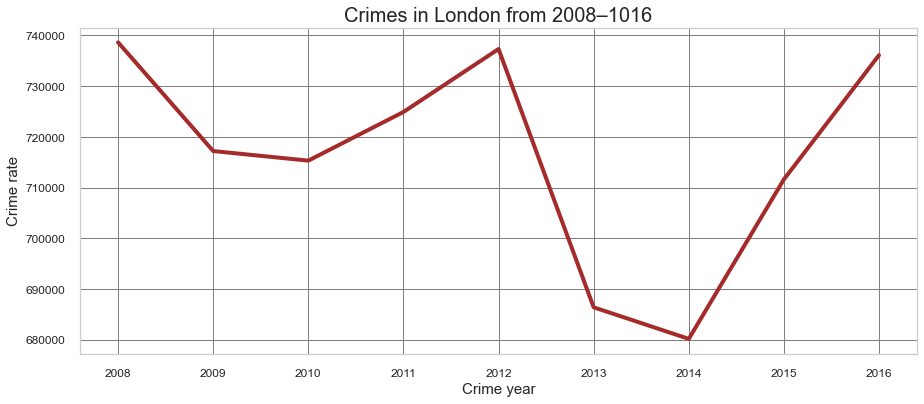

In [12]:
totalyear.plot(
    figsize=(15,6),
    legend=False, 
    linewidth=4, 
    color='brown')
plt.title('Crimes in London from 2008–1016', fontsize=20)
plt.xlabel('Crime year', fontsize=15)
plt.ylabel('Crime rate', fontsize=15)
plt.grid(color='grey', linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa tahun dengan angka kriminalitas tertinggi yang terjadi di London pada tahun 2008 - 2016 terjadi pada tahun 2008 dan terendah pada tahun 2014.

# Area

In [13]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [14]:
df_lima = df.drop(['lsoa_code','month'], axis=1)
df_limawilayah = df_lima.groupby(['borough','year'], axis=0).sum()
limawilayah = df_limawilayah.unstack()
df_lima = limawilayah.loc[['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley']]
df_lima = df_lima.transpose()
df_lima

borough     Barking and Dagenham  Barnet  Bexley  Brent  Bromley
      year                                                      
value 2008                 17656   23944   15305  23504    24015
      2009                 17713   23449   14445  24748    21858
      2010                 17130   23416   13166  25512    19572
      2011                 16686   24007   11325  27669    19868
      2012                 15990   23573   11669  26357    19622
      2013                 15759   22510   11552  23759    18945
      2014                 15426   22572   11844  24426    19668
      2015                 16346   24036   11990  24883    20637
      2016                 16741   24684   12840  26693    20164

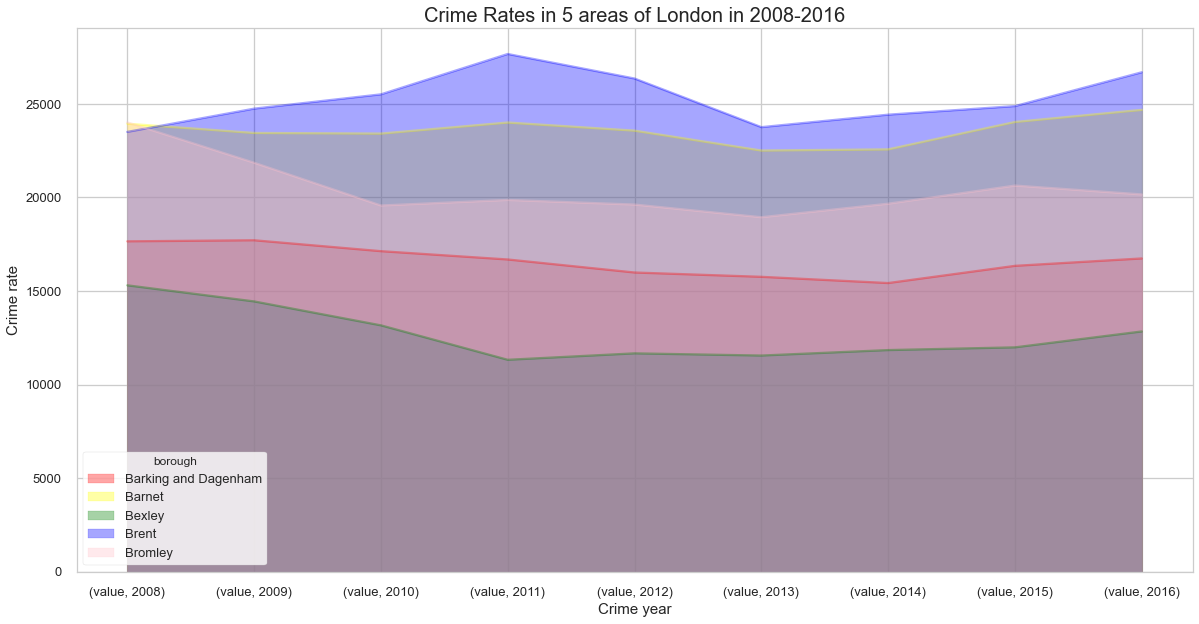

In [15]:
color_list = (['red', 'yellow', 'green','blue', 'pink'])
df_lima.plot(kind='area',
               alpha=0.35,
              stacked=False,
              figsize=(20,10),
            color=color_list)
plt.title('Crime Rates in 5 areas of London in 2008-2016', fontsize=20 )
plt.ylabel('Crime rate', fontsize=15)
plt.xlabel('Crime year', fontsize=15)
plt.show()


Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa tingkat kejahatan pada 5 wilayah yang ada di London pada tahun 2008-2016 memiliki urutan dari yang tertinggi adalah Brent dan yang terendah Bexley.

## Histogram (Diagram Batang)

In [16]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [17]:
bar_data = df_tyear = df.groupby(['year'], axis=0).sum()
bar_data

,value,month
year,,
2008,738641,9743214
2009,717214,9743214
2010,715324,9743214
2011,724915,9743214
2012,737329,9743214
2013,686407,9743214
2014,680183,9743214
2015,711624,9743214
2016,736121,9743214


<function matplotlib.pyplot.show(close=None, block=None)>

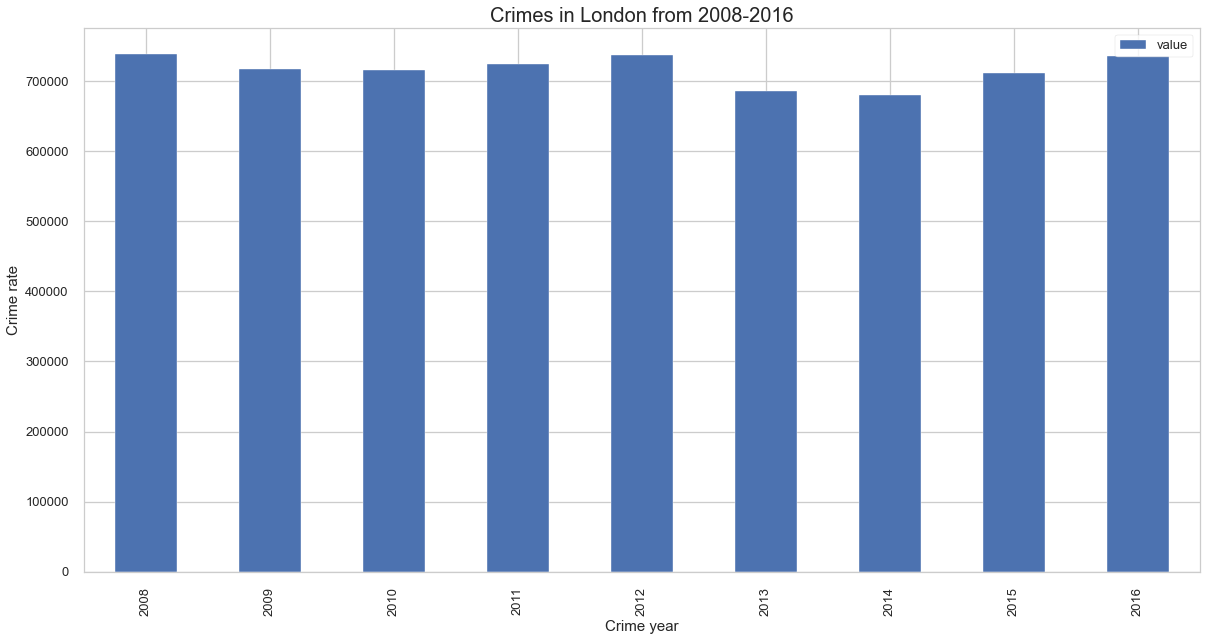

In [18]:
bar_data.plot.bar(y='value',figsize=(20,10))
plt.title('Crimes in London from 2008-2016', fontsize=20)
plt.xlabel('Crime year', fontsize=15)
plt.ylabel('Crime rate', fontsize=15)
plt.show

Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa tahun dengan angka kriminalitas tertinggi yang terjadi di London pada tahun 2008 - 2016 terjadi pada tahun 2008 dan terendah pada tahun 2014. 

## Bar Chart

In [19]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [20]:
df_major = df.groupby(['borough', 'year'])['value'].sum().reset_index()
df_major = pd.pivot_table(df_major, values='value', index='borough', columns='year')
df_major['Total'] = df_major.sum(axis=1)
df_major.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


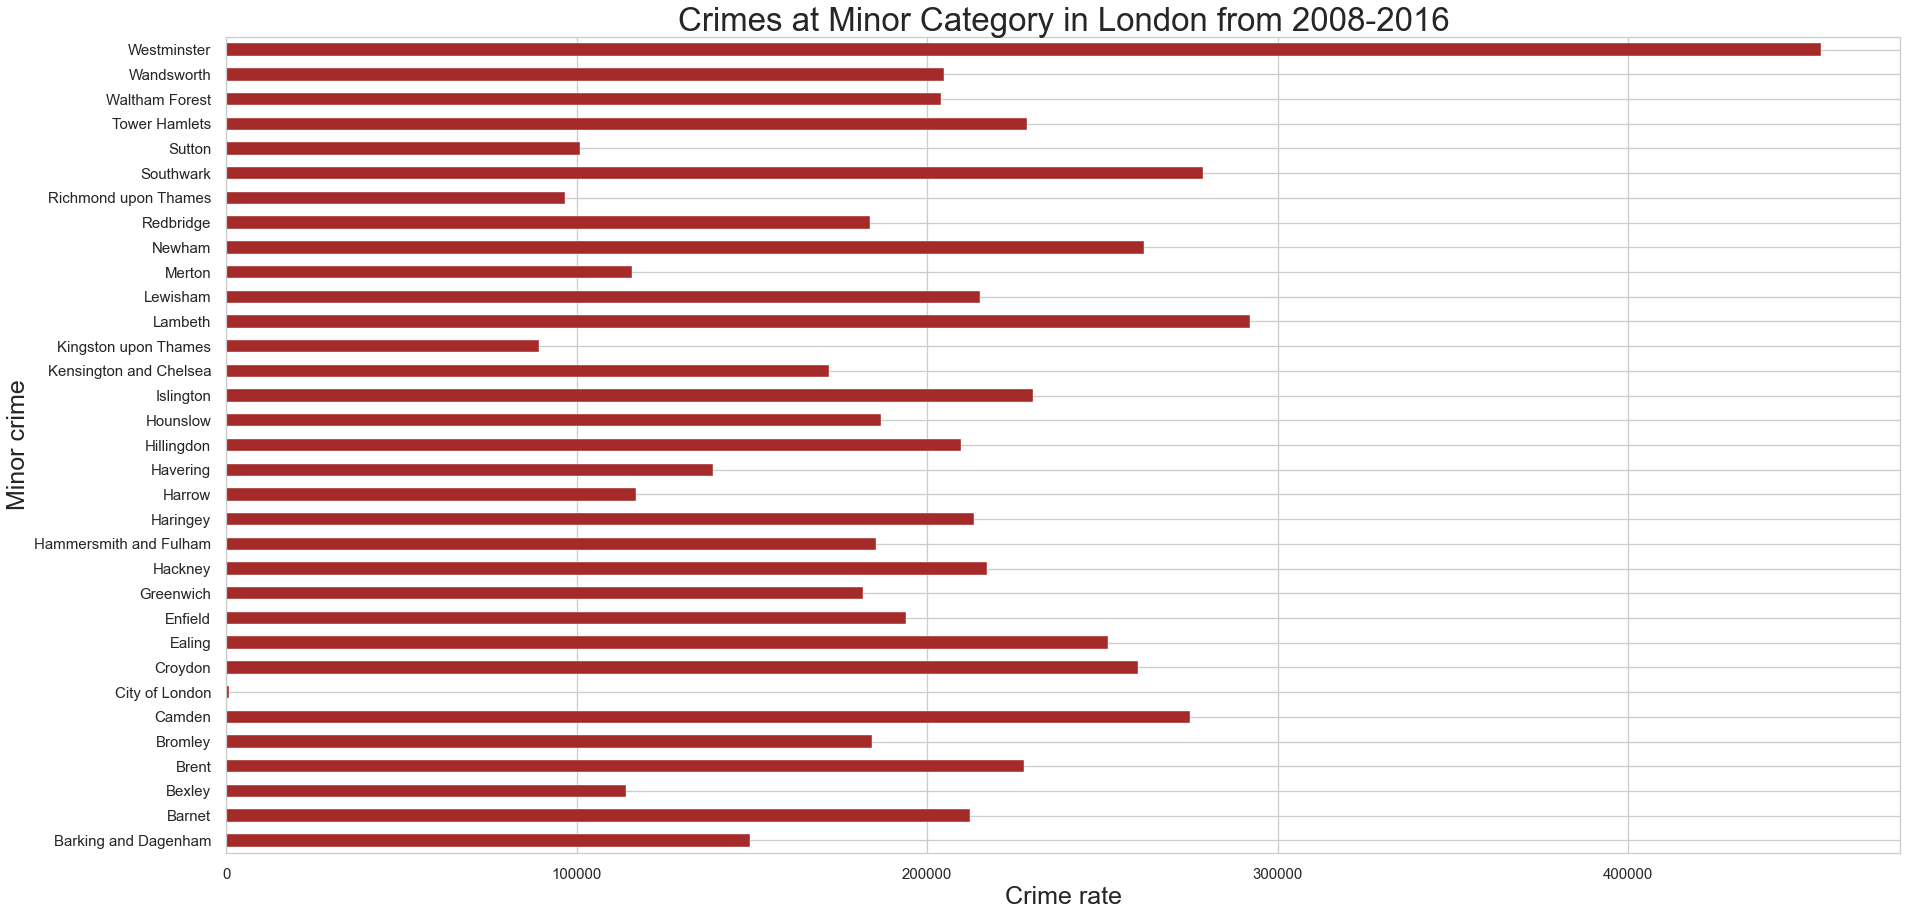

In [21]:
df_major['Total'].plot(kind="barh", figsize=(30,15), color='brown')

plt.title("Crimes at Minor Category in London from 2008-2016", fontsize=33)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Crime rate', fontsize=25)
plt.ylabel('Minor crime', fontsize=25)
plt.show()

Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa angka kejahatan pada kategori minor di London pada tahun 2008-2016 tertinggi terjadi di daerah Lambeth dan Camden.

## Diagram pie

In [22]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [23]:
totalWilayah = df.groupby('major_category').sum()
totalWilayah

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


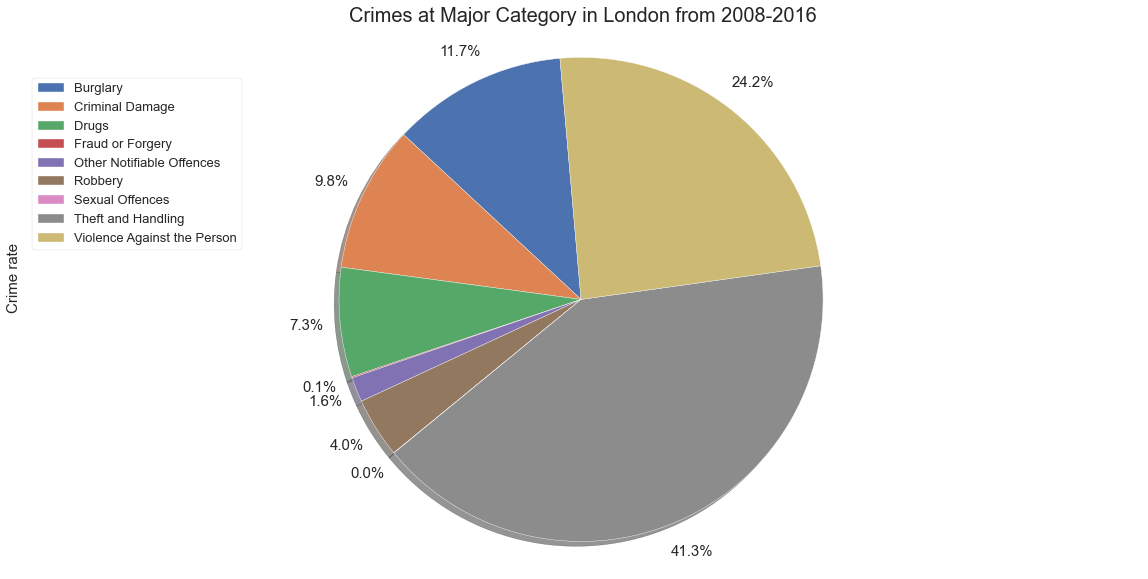

In [24]:
totalWilayah['value'].plot(kind='pie',
                       figsize=(20,10),
                       autopct='%1.1f%%',
                       startangle=95,
                       shadow=True,
                       labels=None, 
                       pctdistance=1.14,
                       fontsize=15) 
                      
plt.title('Crimes at Major Category in London from 2008-2016', fontsize=20)
plt.ylabel('Crime rate', fontsize=15, y=0.54)
plt.axis('equal')

plt.legend(labels=totalWilayah.index.values, loc='upper right', bbox_to_anchor=(0.2,0.92))
plt.show()

Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa angka kejahatan pada kategori major di London pada tahun 2008-2016 tertinggi terjadi di daerah Theft and Handing dengan angka kejahatan mencapai 41.3%

# Box Plot

In [25]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [26]:
borough = df.groupby(['borough', 'year'])['value'].sum().reset_index()
borough = pd.pivot_table(borough, values='value', index='borough', columns='year')
borough['Total'] = borough.sum(axis=1)
borough.sort_values(by='Total')
borough.sort_values(by='Total', ascending=False).head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


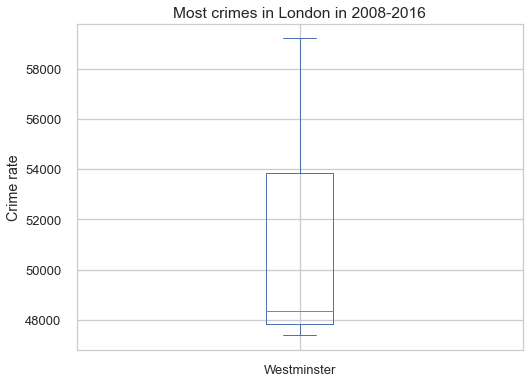

In [27]:
borough.drop(columns='Total').loc['Westminster'].plot(kind='box',figsize=(8,6))

plt.title('Most crimes in London in 2008-2016')
plt.ylabel('Crime rate')
plt.show()

Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa angka kejahatan di London pada tahun 2008-2016 terbanyak di daerah Westminster dengan jumlah kasus sekitar 450000, angka maksimal terjadinya kejahatan sekitar 640000, penyebaran kejahatan dengan hampir 90% berada lebih kecil dari Q1=48000, dan sekitar 10% berada lebih kecil dari Q3=530000.

# Scatter Plot

In [28]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [29]:
totalMajor = df.groupby('major_category').sum()['value']
totalMajor_df = pd.DataFrame()
totalMajor_df['major_category']= totalMajor.index
totalMajor_df['value.sum']= totalMajor.values 
totalMajor_df

,major_category,value.sum
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
3,Fraud or Forgery,5325
4,Other Notifiable Offences,106349
5,Robbery,258873
6,Sexual Offences,1273
7,Theft and Handling,2661861
8,Violence Against the Person,1558081


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


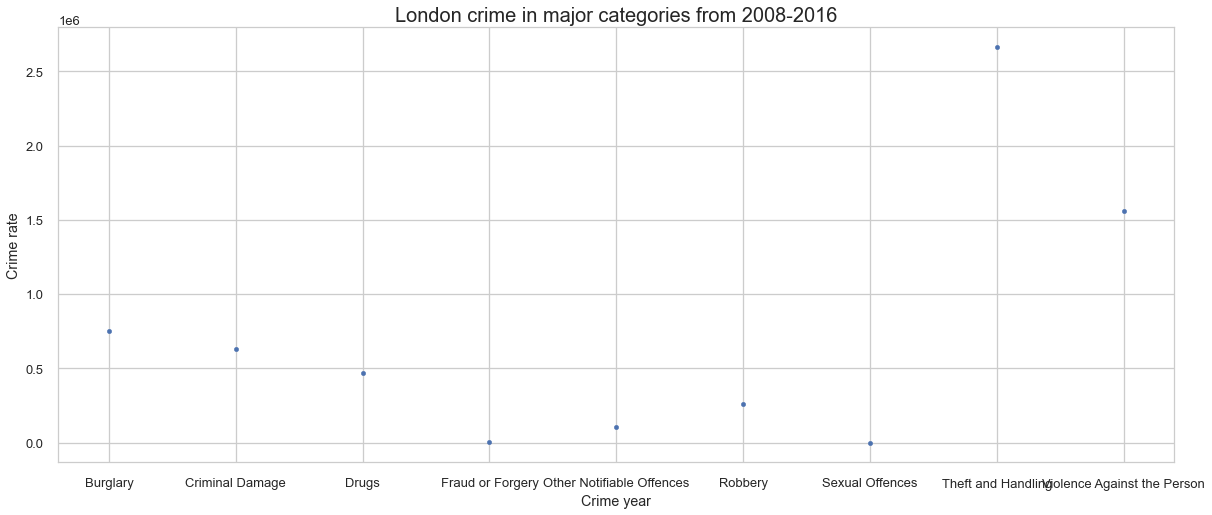

In [30]:
totalMajor_df.plot(kind='scatter', x='major_category', y='value.sum', figsize=(20, 8))

plt.title('London crime in major categories from 2008-2016', fontsize=20)
plt.xlabel('Crime year')
plt.ylabel('Crime rate')
plt.show()

Kesimpulan: Berdasarkan visualisasi diatas dapat disimpulkan bahwa angka kejahatan pada kategori major di London pada tahun 2008-2016 bahwa angka kejahatan tertinggi terjadi di wilayah Theft and Handling, penyebaran datanya terjadi secara acak dan tidak membentuk pola tertentu.

# Word Clouds

In [31]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


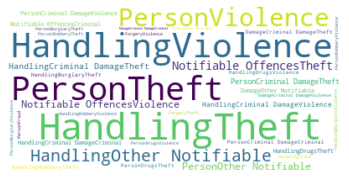

In [32]:
stopwords = set(STOPWORDS)

text = df['major_category']

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(''.join(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Informasi: Visualisasi diatas menampilkan kata-kata yang berasal dari data wilayah London berdasarkan kategori major.

# Folium Maps

In [33]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [34]:
latitude = 51.509865
longitude = -0.118092

london_map = folium.Map(location=[latitude,longitude], zoom_start=12)
london_map

Informasi: Visualisasi diatas menampilkan map wilayah London

# Overall Analysis
### Kesimpulan
Berdasarkan visualisasi data yang dilakukan dapat disimpulkan bahwa
1. Tahun dengan angka kriminalitas tertinggi yang terjadi di London pada tahun 2008 - 2016 terjadi pada tahun 2008 dan terendah pada tahun 2014.
2. Tahun dengan angka kriminalitas tertinggi yang terjadi di London pada tahun 2008 - 2016 terjadi pada tahun 2008 dan terendah pada tahun 2014. 
3. Angka kejahatan pada kategori minor di London pada tahun 2008-2016 tertinggi terjadi di daerah Lambeth dan Camden.
4. Angka kejahatan di London pada tahun 2008-2016 terbanyak di daerah Westminster 